<ipython-input-1-19a65cef1945>:17: RuntimeWarning: covariance is not positive-semidefinite.
  x2,y2 = np.random.multivariate_normal(mean2,cov2,500).T
<ipython-input-1-19a65cef1945>:31: RuntimeWarning: covariance is not positive-semidefinite.
  x5,y5 = np.random.multivariate_normal(mean5, cov5, 500).T
<ipython-input-1-19a65cef1945>:32: RuntimeWarning: covariance is not positive-semidefinite.
  x6,y6 = np.random.multivariate_normal(mean6, cov6, 500).T
<ipython-input-1-19a65cef1945>:44: RuntimeWarning: covariance is not positive-semidefinite.
  x7,y7 = np.random.multivariate_normal(mean7, cov7, 500).T
<ipython-input-1-19a65cef1945>:45: RuntimeWarning: covariance is not positive-semidefinite.
  x8,y8 = np.random.multivariate_normal(mean8, cov8, 500).T
<ipython-input-1-19a65cef1945>:46: RuntimeWarning: covariance is not positive-semidefinite.
  x9,y9 = np.random.multivariate_normal(mean9, cov9, 500).T


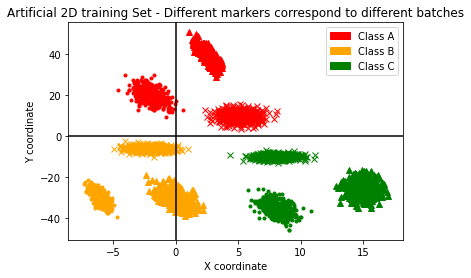

In [1]:
# 'x' points correspond to Batch A, 'o' points correspond to Batch B and '^' points correspond to Batch C
# Red, Yellow and orange correspond to different batches

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.patches as mpatches

#Batch A
mean = [5,10]
mean2 = [-2,-6]
mean3 = [8,-10]
cov = [[1, 0], [0, 5]] 
cov2 = [[0,1],[1,0]]
cov3 = [[1,0],[0,1]]
x, y = np.random.multivariate_normal(mean, cov, 500).T
x2,y2 = np.random.multivariate_normal(mean2,cov2,500).T
x3,y3 = np.random.multivariate_normal(mean3, cov3, 500).T
plt.plot(x, y, 'x',color='r',label='Batch A')
plt.plot(x2,y2,'x',color = 'orange')
plt.plot(x3,y3,'x',color='green')

#Batch B
mean4 = [-2,20]
mean5 = [-6,-30]
mean6 = [8,-35]
cov4 =  [[0.5,-1],[-1,10]]
cov5 = [[1,-10],[0,-1]]
cov6 =   [[1, -5], [-1, 10]] 
x4,y4 = np.random.multivariate_normal(mean4, cov4, 500).T
x5,y5 = np.random.multivariate_normal(mean5, cov5, 500).T
x6,y6 = np.random.multivariate_normal(mean6, cov6, 500).T
plt.plot(x4, y4, '.',color='r',label = 'Batch B')
plt.plot(x5,y5,'.',color = 'orange')
plt.plot(x6,y6,'.',color='green')

#Batch c
mean7 = [2.5,40]
mean8 = [0,-30]
mean9 = [15,-25]
cov7 =  [[1,-10],[0,-1]]
cov8 = [[1, -5], [-1, 10]] 
cov9 =   [[0.5, 0.5], [0.1, -12]] 
x7,y7 = np.random.multivariate_normal(mean7, cov7, 500).T
x8,y8 = np.random.multivariate_normal(mean8, cov8, 500).T
x9,y9 = np.random.multivariate_normal(mean9, cov9, 500).T
plt.plot(x7, y7, '^',color='r',label='Batch C')
plt.plot(x8,y8,'^',color = 'orange')
plt.plot(x9,y9,'^',color='green')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title("Artificial 2D training Set - Different markers correspond to different batches")
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
red_patch = mpatches.Patch(color='red', label='Class A')
orange_patch = mpatches.Patch(color='orange', label='Class B')
green_patch = mpatches.Patch(color='green', label='Class C')
plt.legend(handles=[red_patch,orange_patch,green_patch])

plt.show()

In [7]:
artificial_dataset = np.load('C:\\Users\\vinee\\OneDrive\\Desktop\\Yale-Bio Project\\scDGN-master (1)\\scDGN-master\\arti_data4.npz')
artificial_dataset.files

['features', 'labels', 'accessions']

In [41]:
print(artificial_dataset['labels'].shape)

(3000,)


In [14]:
artificial_dataset['labels'][:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
artificial_dataset

In [16]:
#Merge arrays
x_features = np.concatenate([x3,x2,x,x6,x5,x4,x9,x8,x7])

In [17]:
x_features.shape

(4500,)

In [18]:
y_features = np.concatenate([y3,y2,y,y6,y5,y4,y9,y8,y7])

In [19]:
y_features.shape

(4500,)

In [46]:
batch_list = np.zeros((4500,),dtype='int')
for i in range(1500):
    batch_list[i] = 0
    batch_list[i+1500] = 1
    batch_list[i+3000] = 2

In [47]:
batch_list[-10:]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
labels = np.zeros((4500,),dtype='int')
for i in range(1500):
    if(i<500):
        labels[i] = 2
        labels[i+1500] = 2
        labels[i+3000] = 2
    elif(i>=500 and i<1000):
        labels[i] = 1
        labels[i+1500] = 1
        labels[i+3000] = 1
    elif(i>=1000):
        labels[i] = 0
        labels[i+1500] = 0
        labels[i+3000] = 0
    

In [44]:
labels[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
import pandas as pd
artificial_dataset_new = pd.DataFrame()
artificial_dataset_new['X'] = x_features
artificial_dataset_new['Y'] = y_features
artificial_dataset_new['labels'] = labels
artificial_dataset_new['Accessions'] = batch_list
artificial_dataset_new.to_csv('C:\\Users\\vinee\\OneDrive\\Desktop\\Yale-Bio Project\\scDGN-master (1)\\scDGN-master\\artificial_dataset_new.csv')

In [49]:
batch_list.shape

(4500,)

In [45]:
labels.shape

(4500,)

In [52]:
features = np.vstack([x_features,y_features]).T
from tempfile import TemporaryFile
accessions = batch_list
np.savez('artificial_data5.npz',features = features,labels=labels,accessions=accessions)

In [53]:
feature_list[:3]

array([[  8.50674773,  -9.75754833],
       [  8.34770198, -10.84160818],
       [  7.95856204, -11.87553112]])

In [54]:
artificial_dataset = np.load('artificial_data5.npz')
artificial_dataset.files

['features', 'labels', 'accessions']

In [55]:
artificial_dataset['features'].shape

(4500, 2)